<a href="https://colab.research.google.com/github/edliu2/UsedCarsProject/blob/master/DecisionTree_RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Random Forest + Feature Selection

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('processed.csv')
except:
  dataset = pd.read_csv('drive/My Drive/processed.csv')

# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [2]:
#import model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# define new class for pipeline that passes feature importance or coef to RFE
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

RF_pipeline =  PipelineRFE([
                    ('scale', StandardScaler()), 
                    ('RF', RandomForestRegressor(random_state=0, n_estimators=10, min_samples_leaf=4))
                     ], verbose=True)

selectionObj = RFECV(RF_pipeline, min_features_to_select=1, step=5, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
selectionObj.fit(X_train, y_train)
print("Optimal number of features : %d" % selectionObj.n_features_)

Fitting estimator with 307 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   2.1s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  37.1s
Fitting estimator with 302 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  36.2s
Fitting estimator with 297 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  36.6s
Fitting estimator with 292 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  36.2s
Fitting estimator with 287 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.4s
[Pipeline] ................ (step 2 of 2) Processing RF, total=  35.7s
Fitting estimator with 282 features.
[Pipeline] ............. (step 1 of 2) Processing scale, total=   1.

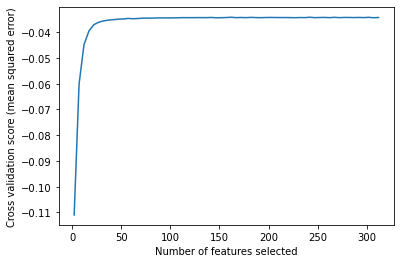

In [3]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean squared error)")
plt.plot(range(2, 5*len(selectionObj.grid_scores_) + 2, 5), selectionObj.grid_scores_)
plt.show()

In [4]:
#check features
selected_features = X_train.columns[selectionObj.support_]
print(selected_features)

Index(['gearbox', 'powerPS', 'kilometer', 'monthOfRegistration',
       'notRepairedDamage', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_chrysler', 'brand_citroen',
       ...
       'model_v70', 'model_vectra', 'model_viano', 'model_vito',
       'model_vivaro', 'model_wrangler', 'model_x_reihe', 'model_z_reihe',
       'model_zafira', 'years_old'],
      dtype='object', length=157)


In [5]:
#Making predictions on the Test Set
y_pred = selectionObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

0.03405538725913902


In [6]:
print(10**y_pred)
print(10**y_test)
print(mean_squared_error(10**y_test,10**y_pred))

[  797.16396685 12185.19869657 10298.9587313  ... 12831.01816248
  9583.69195246  4200.84133083]
85971      1300.0
205804    10900.0
13374      8200.0
235012    11000.0
169522     1150.0
           ...   
16494      4500.0
259055     2500.0
24516     12800.0
13263      7500.0
25001      3500.0
Name: log_price, Length: 81600, dtype: float64
52049748.08540151


In [37]:
not_selected = np.invert(selectionObj.support_)
removed_features = X_train.iloc[:,not_selected]
selected_features = X_train.iloc[:, selectionObj.support_]
#Display removed features by count of positives
print(dict(zip(removed_features.columns.tolist(), removed_features.sum().tolist())))

{'brand_lada': 88, 'brand_lancia': 230, 'brand_rover': 207, 'brand_subaru': 399, 'fuelType_cng': 326, 'fuelType_elektro': 39, 'fuelType_hybrid': 167, 'model_145': 20, 'model_159': 127, 'model_200': 8, 'model_300c': 82, 'model_5_reihe': 246, 'model_601': 113, 'model_6er': 140, 'model_850': 100, 'model_90': 43, 'model_900': 55, 'model_9000': 23, 'model_a1': 410, 'model_accord': 200, 'model_agila': 216, 'model_almera': 285, 'model_altea': 198, 'model_amarok': 23, 'model_antara': 64, 'model_auris': 140, 'model_avensis': 335, 'model_aveo': 70, 'model_aygo': 237, 'model_b_max': 17, 'model_boxster': 259, 'model_bravo': 151, 'model_c1': 218, 'model_c2': 217, 'model_c3': 273, 'model_c4': 260, 'model_c_max': 389, 'model_c_reihe': 123, 'model_captiva': 115, 'model_cayenne': 259, 'model_cc': 105, 'model_ceed': 148, 'model_charade': 13, 'model_cherokee': 75, 'model_citigo': 57, 'model_cl': 158, 'model_clubman': 124, 'model_combo': 205, 'model_cordoba': 185, 'model_corolla': 366, 'model_croma': 29, 

In [39]:
#Display selected features
print(selected_features.columns.tolist())

['gearbox', 'powerPS', 'kilometer', 'monthOfRegistration', 'notRepairedDamage', 'brand_audi', 'brand_bmw', 'brand_chevrolet', 'brand_chrysler', 'brand_citroen', 'brand_dacia', 'brand_daewoo', 'brand_daihatsu', 'brand_fiat', 'brand_ford', 'brand_honda', 'brand_hyundai', 'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_land_rover', 'brand_mazda', 'brand_mercedes_benz', 'brand_mini', 'brand_mitsubishi', 'brand_nissan', 'brand_opel', 'brand_peugeot', 'brand_porsche', 'brand_renault', 'brand_saab', 'brand_seat', 'brand_skoda', 'brand_smart', 'brand_sonstige_autos', 'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen', 'brand_volvo', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv', 'fuelType_benzin', 'fuelType_diesel', 'fuelType_lpg', 'model_147', 'model_156', 'model_1_reihe', 'model_1er', 'model_2_reihe', 'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500', 'model_5